In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('COVID clinical trials.csv')  

In [3]:
print(df.head())
print(df.info())
print(df.describe())
print(df.describe(include='object'))

   Rank   NCT Number                                              Title  \
0     1  NCT04785898  Diagnostic Performance of the ID Now™ COVID-19...   
1     2  NCT04595136  Study to Evaluate the Efficacy of COVID19-0001...   
2     3  NCT04395482  Lung CT Scan Analysis of SARS-CoV2 Induced Lun...   
3     4  NCT04416061  The Role of a Private Hospital in Hong Kong Am...   
4     5  NCT04395924         Maternal-foetal Transmission of SARS-Cov-2   

        Acronym                  Status         Study Results  \
0   COVID-IDNow  Active, not recruiting  No Results Available   
1      COVID-19      Not yet recruiting  No Results Available   
2   TAC-COVID19              Recruiting  No Results Available   
3      COVID-19  Active, not recruiting  No Results Available   
4  TMF-COVID-19              Recruiting  No Results Available   

                                          Conditions  \
0                                            Covid19   
1                               SARS-CoV-2 Inf

In [4]:
missing_data = df.isnull().mean() * 100
print(missing_data)

Rank                        0.000000
NCT Number                  0.000000
Title                       0.000000
Acronym                    57.115684
Status                      0.000000
Study Results               0.000000
Conditions                  0.000000
Interventions              15.320768
Outcome Measures            0.605222
Sponsor/Collaborators       0.000000
Gender                      0.172921
Age                         0.000000
Phases                     42.555767
Enrollment                  0.587930
Funded Bys                  0.000000
Study Type                  0.000000
Study Designs               0.605222
Other IDs                   0.017292
Start Date                  0.587930
Primary Completion Date     0.622514
Completion Date             0.622514
First Posted                0.000000
Results First Posted       99.377486
Last Update Posted          0.000000
Locations                  10.115857
Study Documents            96.852845
URL                         0.000000
d

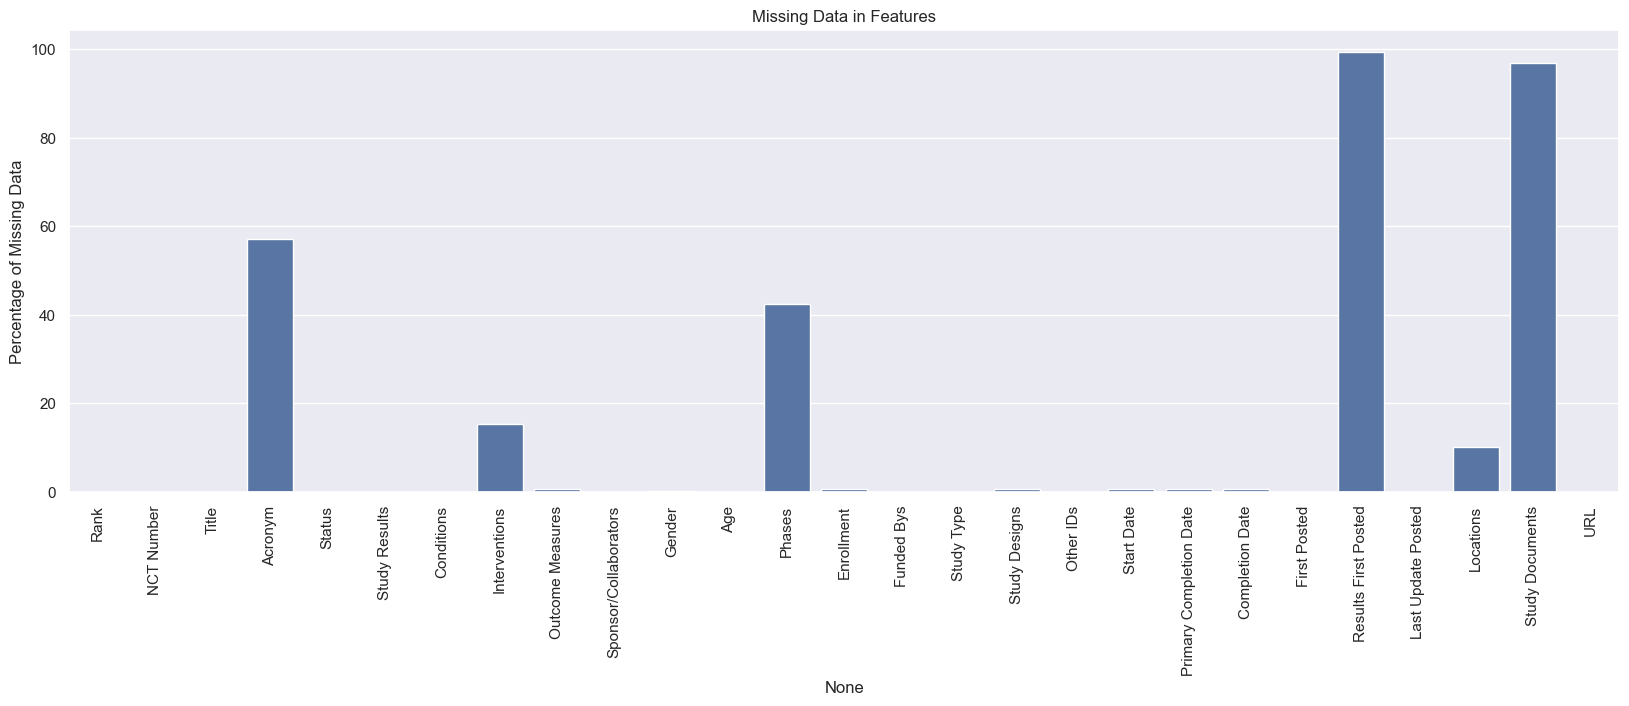

In [6]:
def visualize_data(data, caption='', ylabel='Percentage of Missing Data'):
    sns.set(rc={'figure.figsize': (20, 6)})
    plt.xticks(rotation=90)
    sns.barplot(x=data.index[:40], y=data.values[:40]).set_title(caption)
    plt.ylabel(ylabel)
    plt.show()

visualize_data(missing_data, 'Missing Data in Features')

In [7]:
df.drop(['Results First Posted', 'Study Documents'], axis=1, inplace=True)

In [8]:
df.drop_duplicates(inplace=True)
df.dropna(thresh=10, inplace=True)

In [9]:
df['Acronym'].fillna("Missing Acronym", inplace=True)

categorical_features = df.select_dtypes(include='object').columns
for feature in categorical_features:
    if df[feature].isnull().mean() > 0:
        df[feature].fillna(f"Missing {feature}", inplace=True)

C:\Users\sanga\AppData\Local\Temp\ipykernel_19112\437739559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Acronym'].fillna("Missing Acronym", inplace=True)
C:\Users\sanga\AppData\Local\Temp\ipykernel_19112\437739559.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [10]:
df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)

C:\Users\sanga\AppData\Local\Temp\ipykernel_19112\1863546795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Enrollment'].fillna(df['Enrollment'].median(), inplace=True)


In [11]:
df['Country'] = df['Locations'].apply(lambda x: str(x).split(',')[-1].strip())

In [12]:
print(df.isnull().sum())

Rank                       0
NCT Number                 0
Title                      0
Acronym                    0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
URL                        0
Country                    0
dtype: int64


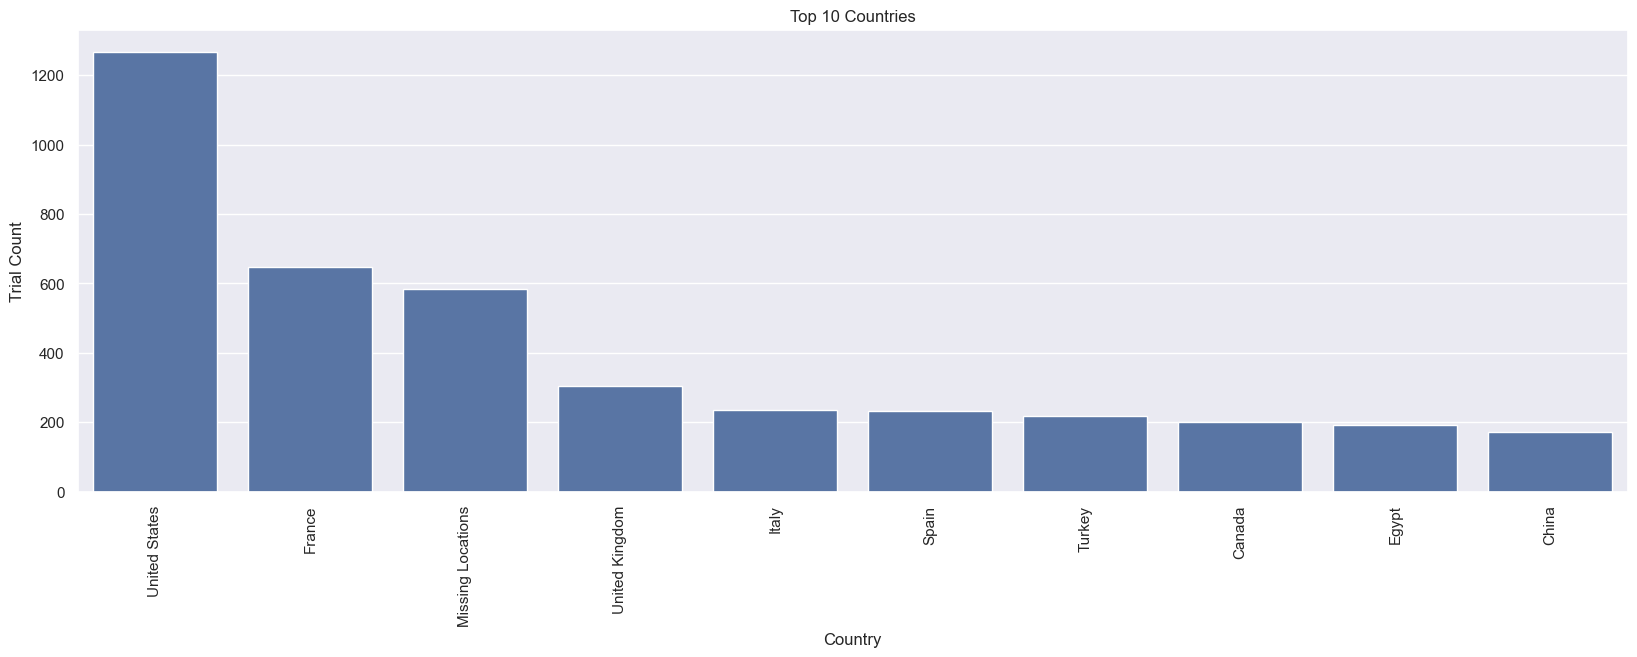

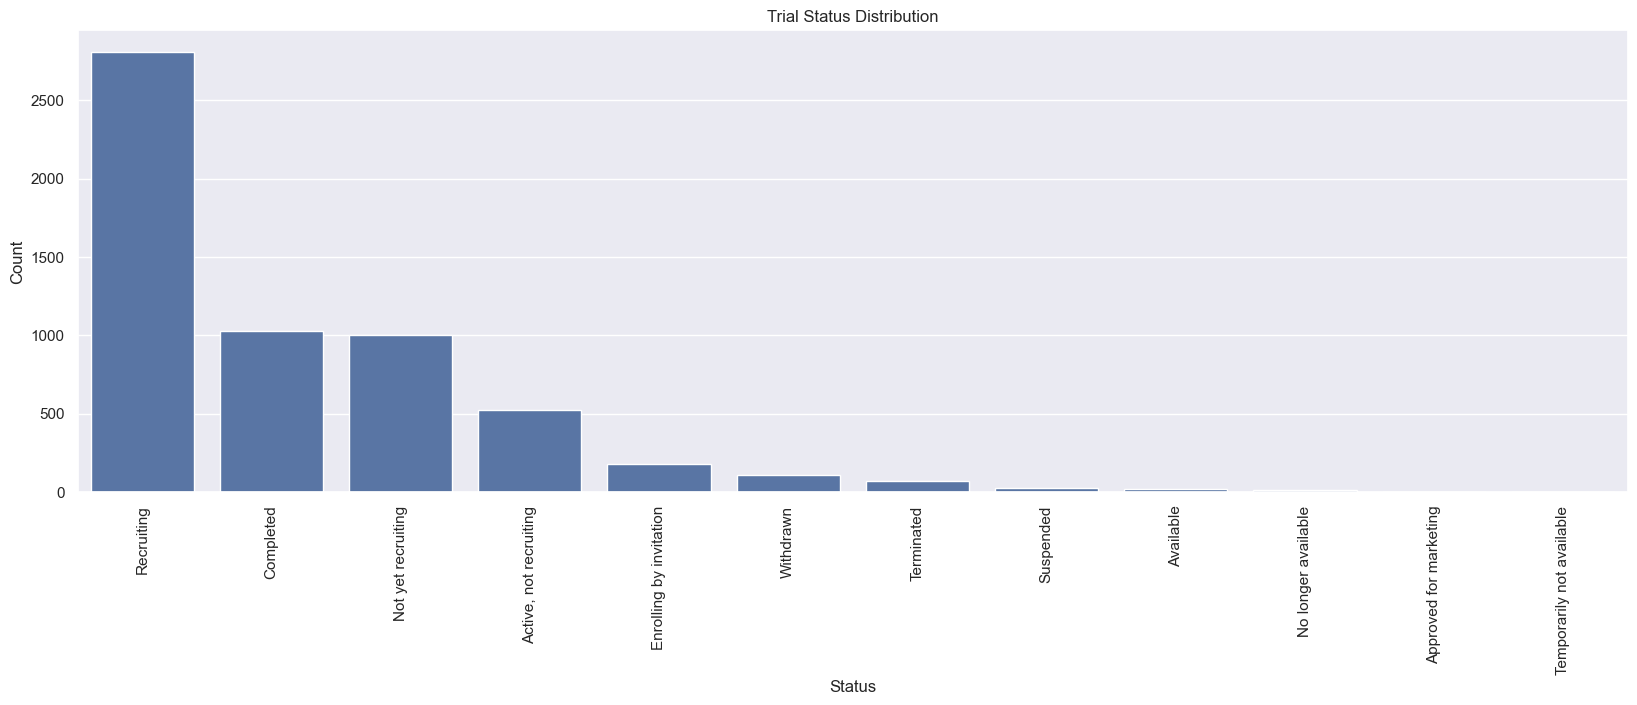

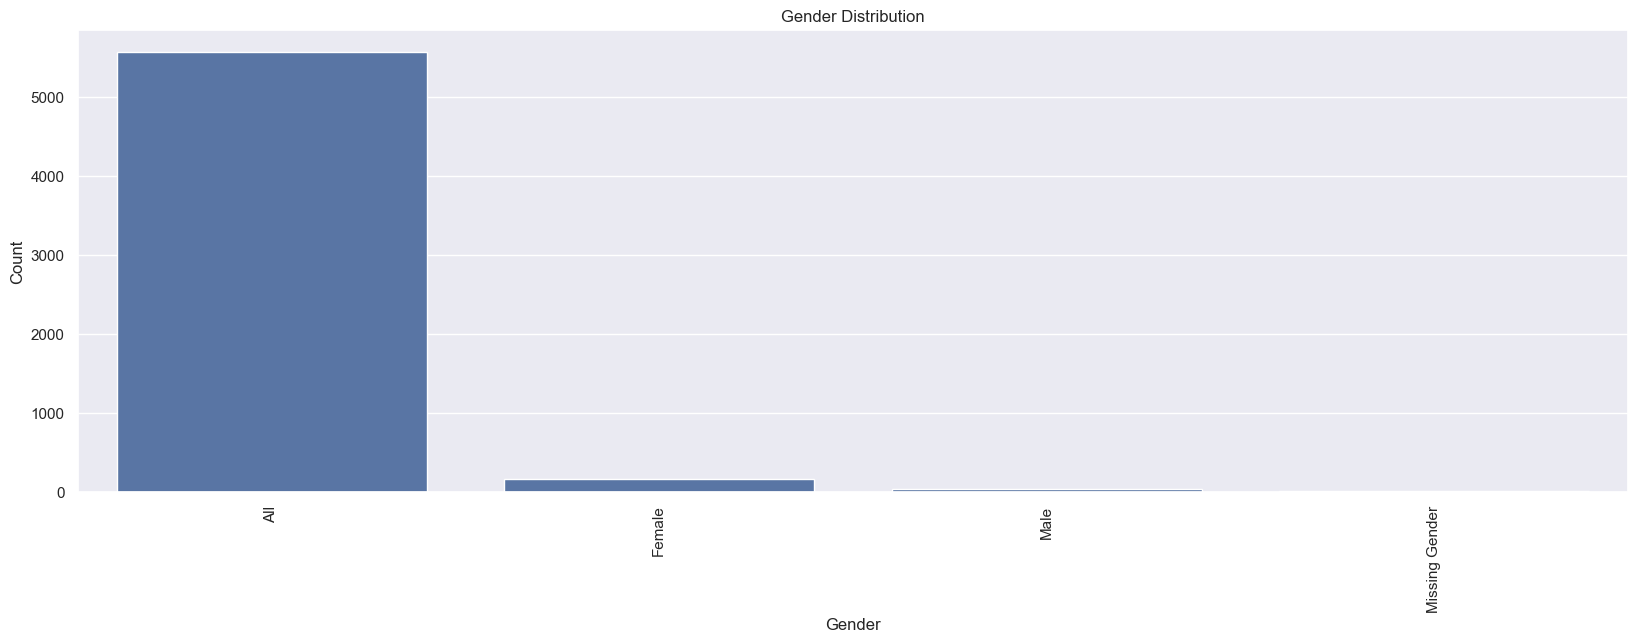

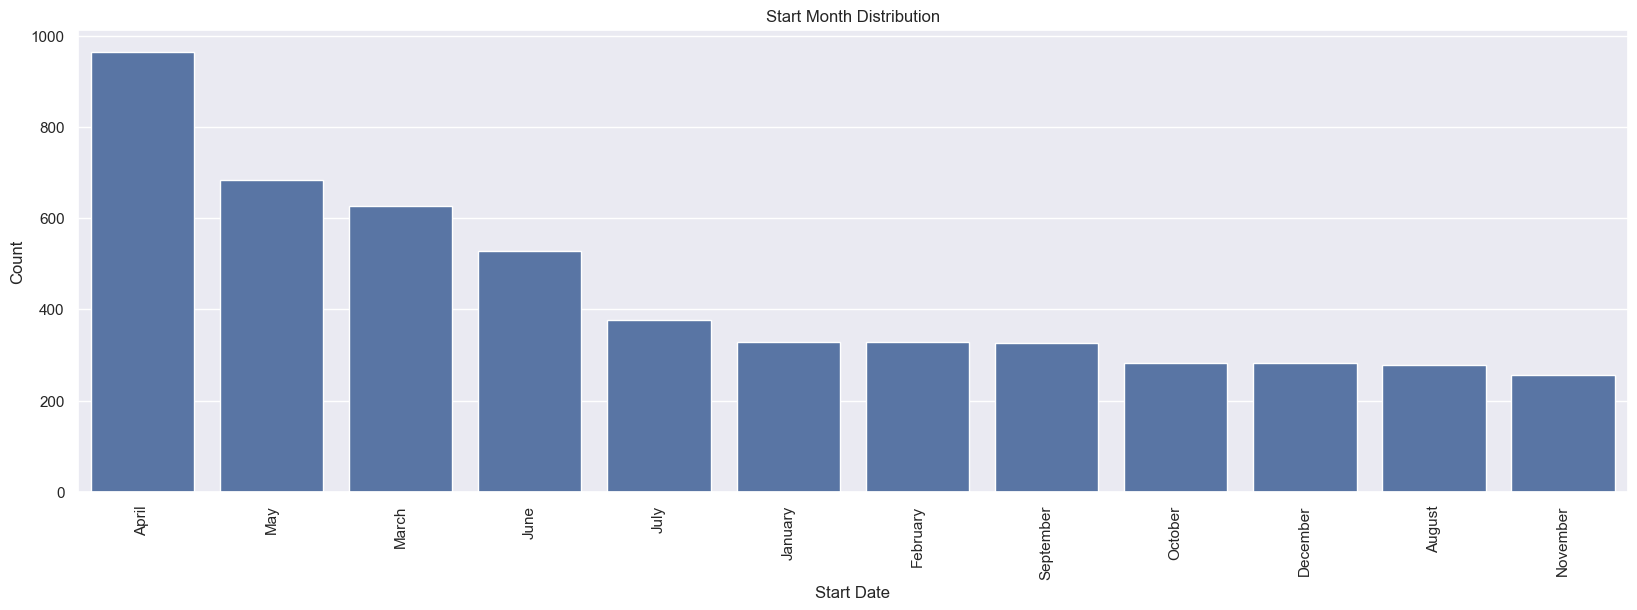

In [13]:
visualize_data(df['Country'].value_counts()[:10], 'Top 10 Countries', 'Trial Count')
visualize_data(df['Status'].value_counts(), 'Trial Status Distribution', 'Count')
visualize_data(df['Gender'].value_counts(), 'Gender Distribution', 'Count')
start_month = pd.to_datetime(df['Start Date'], errors='coerce').dt.month_name()
visualize_data(start_month.value_counts(), 'Start Month Distribution', 'Count')

In [14]:
df.to_csv('cleaned_covid_clinical_trials.csv', index=False)